In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chinagdp/china_gdp.csv


Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$

Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Polynomial Regression

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta_1  x + \theta_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values? 
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 


In [3]:

plt.style.use('ggplot')

<font color="blue" >
    1.1. Qubic Function:

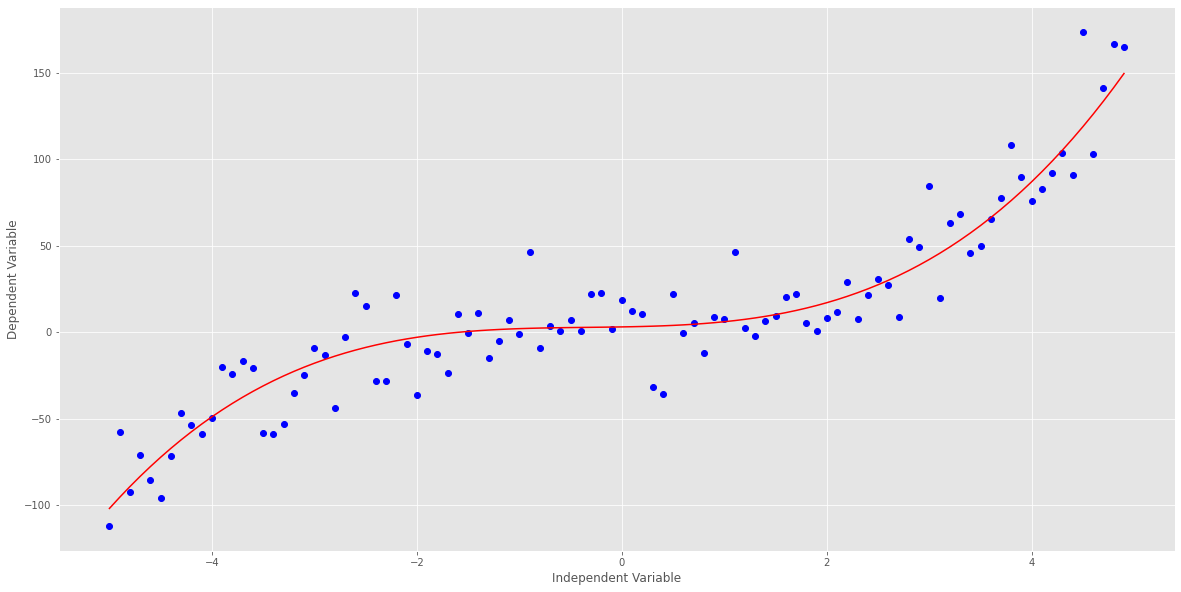

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
plt.figure(figsize=(20,10))
##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

<font color="blue" >
    1.2. Quadratic Function:

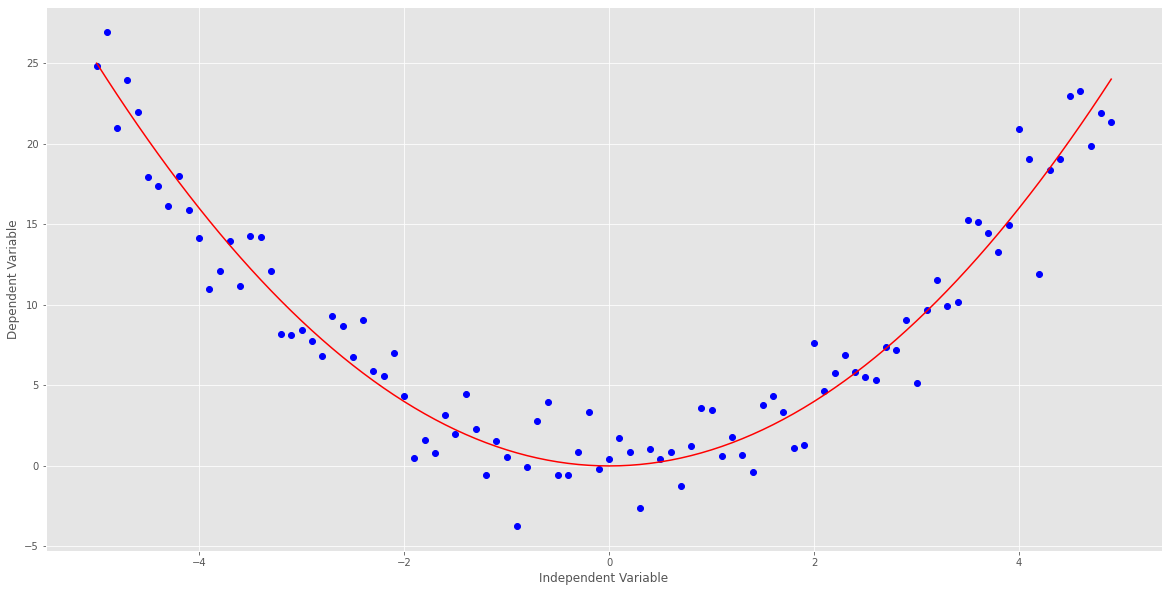

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
plt.figure(figsize=(20,10))
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# 2. Other Non_Linear Regressions:

<font color="blue" >
    2.1. Exponential Function:

An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 


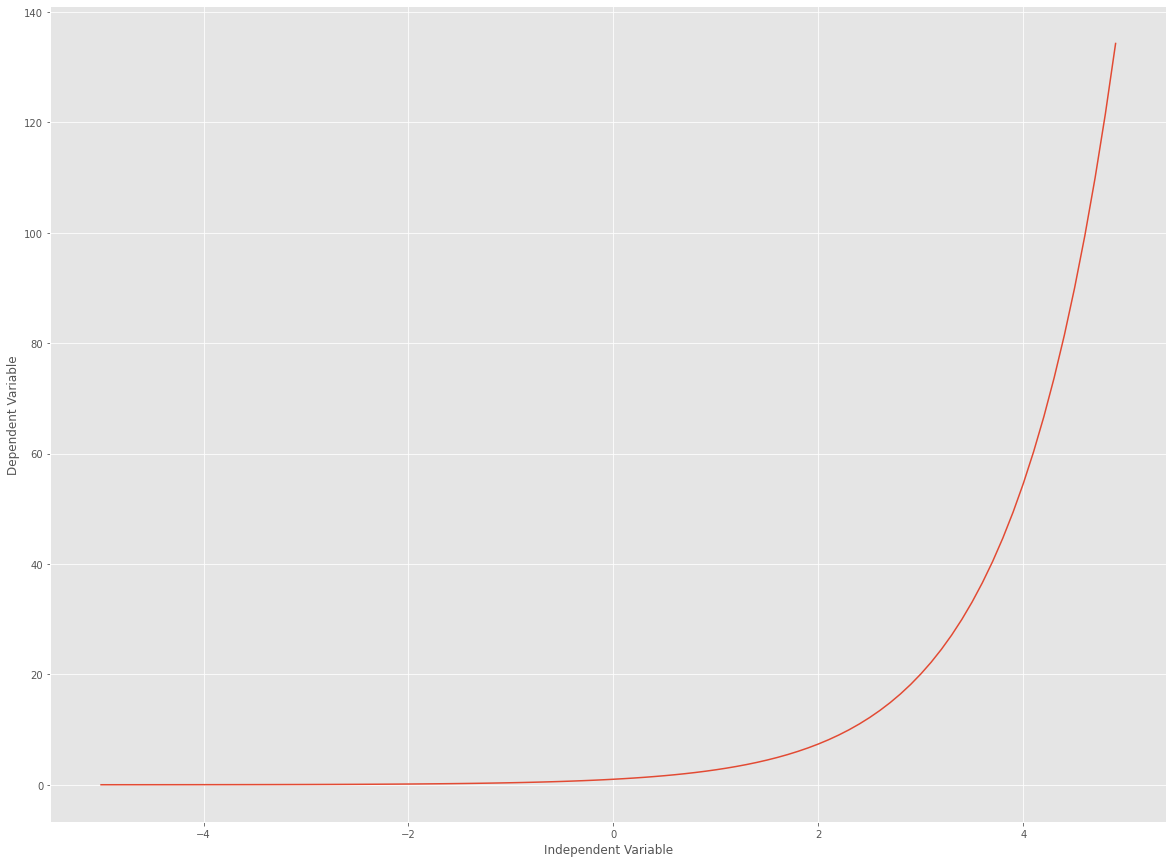

In [6]:
plt.figure(figsize=(20,15))
X = np.arange(-5.0, 5.0, 0.1)
Y= np.exp(X)
plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

<font color="blue" >
    2.2. Logarithmic Function:

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of **log()**: i.e. $$ y = \log(x)$$

We can also consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


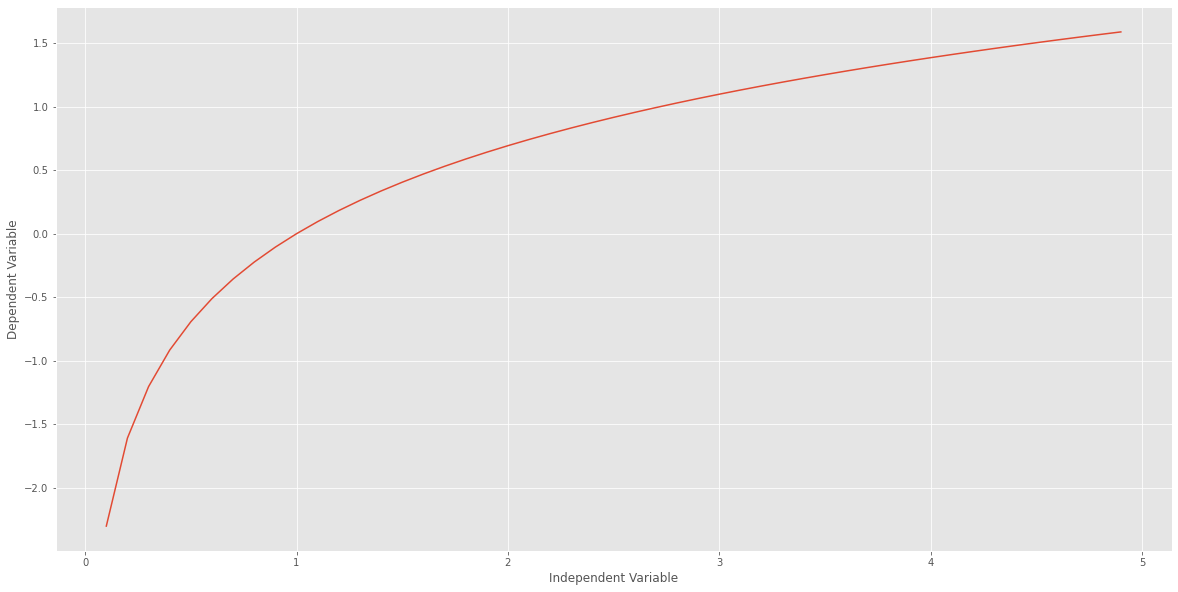

In [7]:
plt.figure(figsize=(20,10))
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

<font color="blue" >
    2.3. Sigmoid(Logistic) Function:

Sigmoid(Logistic):
$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$
​


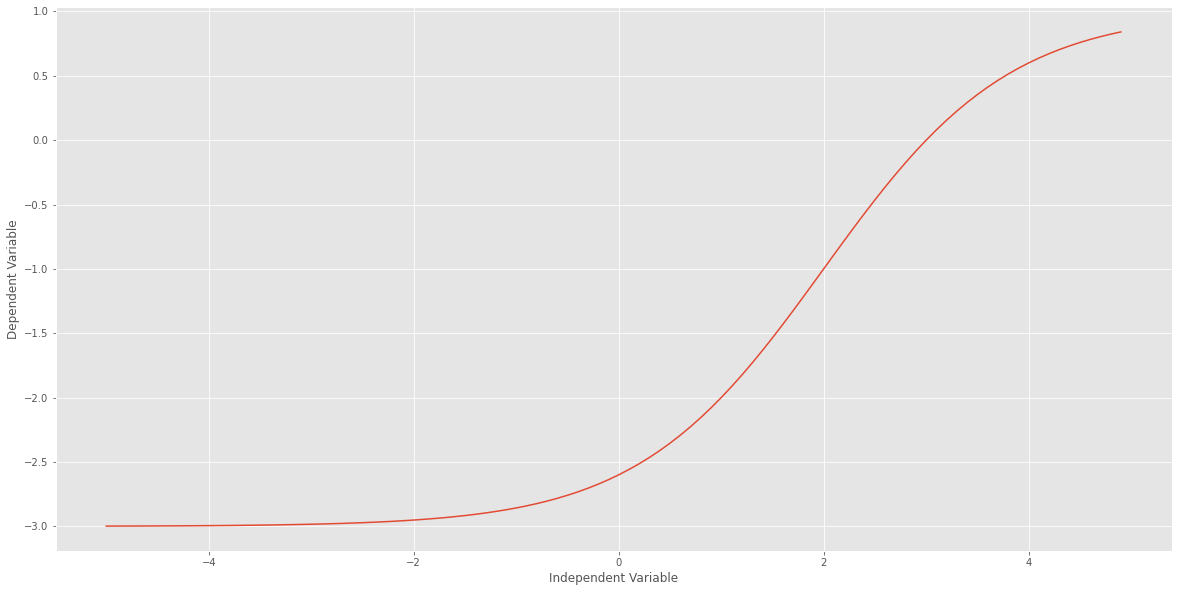

In [8]:
plt.figure(figsize=(20,10))
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# 3. Model Selection and Implemeting Algorithm

<font color="blue" >
    3.1. Visualization of the Data:

In [9]:
df=pd.read_csv("../input/chinagdp/china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


Text(0.5, 1.0, "China's GDP Development Throughout Years")

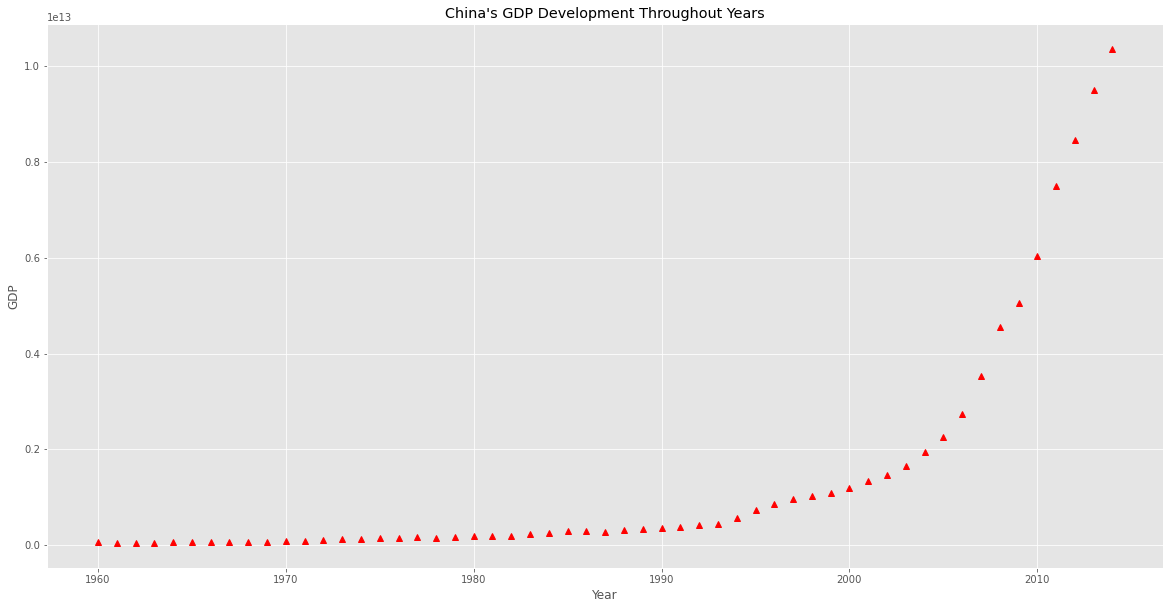

In [10]:
plt.figure(figsize=(20,10))
plt.plot(df["Year"],df["Value"],'r^')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title("China's GDP Development Throughout Years")

From an initial look at the plot, we determine that either the exponential or logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end:

In [11]:
x_data, y_data = (df["Year"].values, df["Value"].values)
x_data

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [12]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [13]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.

In [14]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 690.453017, beta_2 = 0.997207


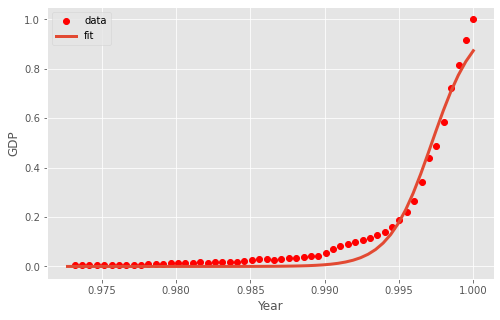

In [15]:

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

<font color="blue" >
    3.1. Splitting Data as Train and Test Set and Implementing Model:
    
    
    We can also sklearn algorithms on this data set and SVR fit better for non-linear regressions

In [16]:
#we normalize data
X=df["Year"]/max(df["Year"])
y=df["Value"]/max(df["Value"])
X

0     0.973188
1     0.973684
2     0.974181
3     0.974677
4     0.975174
5     0.975670
6     0.976167
7     0.976663
8     0.977160
9     0.977656
10    0.978153
11    0.978649
12    0.979146
13    0.979643
14    0.980139
15    0.980636
16    0.981132
17    0.981629
18    0.982125
19    0.982622
20    0.983118
21    0.983615
22    0.984111
23    0.984608
24    0.985104
25    0.985601
26    0.986097
27    0.986594
28    0.987090
29    0.987587
30    0.988083
31    0.988580
32    0.989076
33    0.989573
34    0.990070
35    0.990566
36    0.991063
37    0.991559
38    0.992056
39    0.992552
40    0.993049
41    0.993545
42    0.994042
43    0.994538
44    0.995035
45    0.995531
46    0.996028
47    0.996524
48    0.997021
49    0.997517
50    0.998014
51    0.998510
52    0.999007
53    0.999503
54    1.000000
Name: Year, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [19]:
X_train.shape

(41,)

In [20]:
X_test.shape

(14,)

In [21]:
y_train.shape

(41,)

In [22]:
y_test.shape

(14,)

In [23]:
from sklearn.svm import SVR
#We will choose Regression version of Support Vector Machines

In [24]:
model=SVR()

In [25]:
model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [26]:
predictions=model.predict(X_test.values.reshape(-1, 1))

In [27]:
predictions

array([0.04319491, 0.01181118, 0.75993871, 0.18993841, 0.07587415,
       0.09539928, 0.10446664, 0.30082772, 0.11141449, 0.09552795,
       0.1136775 , 0.56558376, 0.04325668, 0.06975067])

In [28]:
y_test=y_test.values.reshape(-1,1)
y_test

array([[0.10521147],
       [0.04103727],
       [0.81716665],
       [0.15933902],
       [0.02885665],
       [0.0067595 ],
       [0.01083164],
       [0.21908602],
       [0.01556399],
       [0.00483806],
       [0.01707961],
       [0.48860473],
       [0.03341025],
       [0.11639597]])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
pred=pd.DataFrame(y_test,predictions)
pred

,0
0.043195,0.105211
0.011811,0.041037
0.759939,0.817167
0.189938,0.159339
0.075874,0.028857
0.095399,0.006760
0.104467,0.010832
0.300828,0.219086
0.111414,0.015564
0.095528,0.004838


In [31]:
print(mean_absolute_error(y_test, predictions))
#The error are very low

0.06476521384029407


In [32]:
print(mean_squared_error(y_test,predictions))

0.0049550060255230685


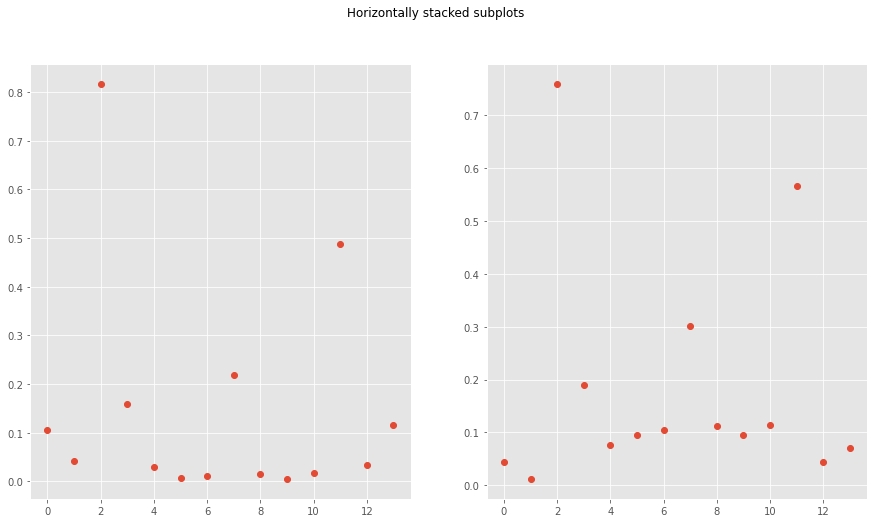

In [33]:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
fig.suptitle('Horizontally stacked subplots')
ax1.plot(y_test,"o")
ax2.plot(predictions,"o")


<font color="blue" >
    As we can see from the plot above and error reports, SVR performs very good although we have verty few data for training set